# Sourcepredict example 1: Gut host species prediction

In [2]:
import pandas as pd

In this example, we'll apply Sourcepredict to the example dataset provided in the Sourcepredict directory.   

The [example datasets](https://github.com/maxibor/sourcepredict/blob/master/data/modern_gut_microbiomes_sources.csv) contains the following samples:
- *Homo sapiens* gut microbiome ([1](https://doi.org/10.1038/nature11234), [2](https://doi.org/10.1093/gigascience/giz004), [3](https://doi.org/10.1038/s41564-019-0409-6), [4](https://doi.org/10.1016/j.cell.2019.01.001), [5](https://doi.org/10.1038/ncomms7505), [6](http://doi.org/10.1016/j.cub.2015.04.055))
- *Canis familiaris* gut microbiome ([1](https://doi.org/10.1186/s40168-018-0450-3))
- Soil microbiome ([1](https://doi.org/10.1073/pnas.1215210110), [2](https://www.ncbi.nlm.nih.gov/bioproject/?term=322597), [3](https://dx.doi.org/10.1128%2FAEM.01646-17))

## Preparing the data

In [3]:
otus = pd.read_csv("../data/modern_gut_microbiomes_sources.csv", index_col=0)
labels = pd.read_csv("../data/modern_gut_microbiomes_labels.csv", index_col=0)

This is a OTU count table containing the samples as columns headers, and the TAXID as row indices

In [5]:
otus.head()

,SRR1175007,SRR042182,SRR061154,SRR061499,SRR063469,SRR062324,SRR1179037,SRR061236,SRR061456,SRR642021,...,mgm4477903_3,mgm4477807_3,mgm4477874_3,mgm4477904_3,mgm4477804_3,mgm4477873_3,ERR1939166,SRR3578625,ERR1939165,SRR3578645
TAXID,,,,,,,,,,,,,,,,,,,,,
0,3528337.0,11563613.0,10084261.0,20054993.0,8747525.0,12116517.0,4191329.0,13992760.0,14825759.0,11083673.0,...,6169203.0,8820851.0,5713837.0,10238500.0,5055930.0,10380594.0,13391896.0,1553.0,14802198.0,736.0
6,0.0,78.0,0.0,127.0,0.0,79.0,0.0,0.0,0.0,172.0,...,68.0,247.0,211.0,156.0,147.0,383.0,1353.0,0.0,1522.0,0.0
7,0.0,78.0,0.0,127.0,0.0,79.0,0.0,0.0,0.0,172.0,...,68.0,247.0,211.0,156.0,147.0,383.0,1353.0,0.0,1522.0,0.0
9,0.0,129.0,0.0,153.0,0.0,151.0,0.0,165.0,96.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,77.0,0.0,65.0,0.0
10,0.0,160.0,0.0,193.0,0.0,99.0,0.0,55.0,249.0,238.0,...,0.0,0.0,0.0,0.0,0.0,0.0,263.0,0.0,466.0,0.0


The labels file contains the mapping of samples names with their actual origin (sources)

In [8]:
labels.head()

,labels
SRR1175007,Homo_sapiens
SRR042182,Homo_sapiens
SRR061154,Homo_sapiens
SRR061499,Homo_sapiens
SRR063469,Homo_sapiens


We will divide the source in training (95%) and testing (5%) dataset

In [17]:
otus_train = otus.sample(frac=0.95, axis=1)
otus_test = otus.drop(otus_train.columns, axis=1)

We also have to subset the labels file to only the training dataset 

In [18]:
train_labels = labels.loc[otus_train.columns,:]
test_labels = labels.loc[otus_test.columns,:]

## Sourcepredict

Last but not least, we must export the files to `csv` to run sourcepredict

In [21]:
otus_train.to_csv("gut_species_sources.csv")
otus_test.to_csv("gut_species_sinks.csv")
train_labels.to_csv("gut_species_labels.csv")

We'll now launch sourcepredict with the GMPR normalization method, and the t-SNE embedding, on 6 cores.

In [22]:
!sourcepredict -s gut_species_sources.csv \
               -l gut_species_labels.csv \
               -n GMPR \
               -m TSNE \
               -e example_embedding.csv \
               -t 6 gut_species_sinks.csv

Step 1: Checking for unknown proportion
  == Sample: SRR061140 ==
	Adding unknown
	Normalizing (GMPR)
	Computing Bray-Curtis distance
	Performing MDS embedding in 2 dimensions
	KNN machine learning
	Training KNN classifier on 6 cores...
	-> Testing Accuracy: 0.97
	----------------------
	- Sample: SRR061140
		 known:89.68%
		 unknown:10.32%
  == Sample: SRR1930179 ==
	Adding unknown
	Normalizing (GMPR)
	Computing Bray-Curtis distance
	Performing MDS embedding in 2 dimensions
	KNN machine learning
	Training KNN classifier on 6 cores...
	-> Testing Accuracy: 1.0
	----------------------
	- Sample: SRR1930179
		 known:98.48%
		 unknown:1.52%
  == Sample: SRR1761714 ==
	Adding unknown
	Normalizing (GMPR)
	Computing Bray-Curtis distance
	Performing MDS embedding in 2 dimensions
	KNN machine learning
	Training KNN classifier on 6 cores...
	-> Testing Accuracy: 0.99
	----------------------
	- Sample: SRR1761714
		 known:98.81%
		 unknown:1.19%
  == Sample: SRR1761669 ==
	Adding unknown
	Normal

Two files were generated by Sourcepredict:
- `gut_species_sinks.sourcepredict.csv` which contains the proportions of each source  

In [23]:
sourcepred = pd.read_csv("gut_species_sinks.sourcepredict.csv", index_col=0)

In [24]:
sourcepred

,SRR061140,SRR1930179,SRR1761714,SRR1761669,SRR1761671,SRR7658636,SRR7658609,SRR7658624,SRR7658682,SRR2189052,...,ERR2402780,ERR1916139,ERR1913614,ERR1915757,ERR1914185,ERR1913950,ERR1914208,ERR1915100,ERR1915204,ERR1913542
Canis_familiaris,0.017116,0.018797,0.018858,0.018797,0.018797,0.018797,0.018797,0.060367,0.110755,0.018797,...,0.871639,0.925936,0.925936,0.925936,0.925936,0.925936,0.925936,0.925936,0.925646,0.925936
Homo_sapiens,0.866062,0.951112,0.954214,0.951112,0.951134,0.951131,0.951112,0.912196,0.859040,0.951112,...,0.041329,0.043886,0.043886,0.043886,0.043886,0.043886,0.043886,0.043886,0.044175,0.043886
Soil,0.013603,0.014939,0.014988,0.014939,0.014940,0.014939,0.014939,0.015031,0.015053,0.014939,...,0.014145,0.015026,0.015026,0.015026,0.015026,0.015026,0.015026,0.015026,0.015027,0.015026
unknown,0.103218,0.015152,0.011940,0.015152,0.015129,0.015133,0.015152,0.012405,0.015152,0.015152,...,0.072886,0.015152,0.015152,0.015152,0.015152,0.015152,0.015152,0.015152,0.015152,0.015152


Let's check which organism was predicted for each samples, and compare it with the true source

In [32]:
comparison = sourcepred.idxmax().to_frame(name="prediction").merge(test_labels, left_index=True, right_index=True)
comparison.head()

,prediction,labels
SRR061140,Homo_sapiens,Homo_sapiens
SRR1930179,Homo_sapiens,Homo_sapiens
SRR1761714,Homo_sapiens,Homo_sapiens
SRR1761669,Homo_sapiens,Homo_sapiens
SRR1761671,Homo_sapiens,Homo_sapiens


Finally, let's compute the accuracy

In [35]:
(comparison["prediction"] == comparison["labels"]).sum()/comparison.shape[0]

1.0

All the sinks samples were correctly predicted ! 

- The second file generated by sourcepredict is `example_embedding.csv` which contains the embedding coordinates of all samples (sources and sinks)

In [36]:
embed = pd.read_csv("example_embedding.csv", index_col=0)
embed.head()

,PC1,PC2,labels,name
SRR7658617,5.048055,-18.337936,Homo_sapiens,SRR7658617
ERR1916180,-24.480751,-1.701613,Canis_familiaris,ERR1916180
ERR1914445,-25.628300,7.534146,Canis_familiaris,ERR1914445
SRR5898947,-2.104542,-20.617863,Homo_sapiens,SRR5898947
SRR346691,1.332757,24.435493,Homo_sapiens,SRR346691


We can plot this embedding, using for example, [plotnine](https://plotnine.readthedocs.io/en/stable/), which implements the grammar of graphics in Python

In [37]:
from plotnine import *
import warnings
warnings.filterwarnings('ignore')

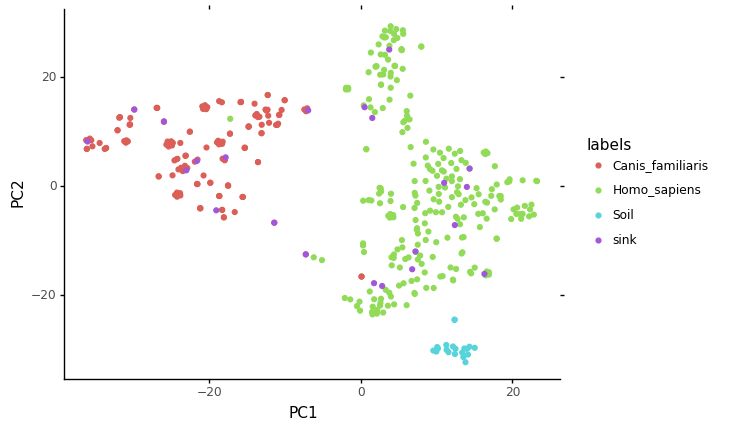

<ggplot: (7554096346)>

In [38]:
ggplot(data = embed, mapping = aes(x="PC1",y="PC2", color="labels")) + geom_point() + theme_classic()

We can see on this plot where the sink samples were embedded

## Sourcetracker2

"[SourceTracker](https://www.ncbi.nlm.nih.gov/pubmed/21765408) is designed to predict the source of microbial communities in a set of input samples" and is generally consired as the gold standard method to do so.
The version 2 is a rewrite of the original Sourcetracker in Python.

We'll reuse the same training and test files, but we need to reformat them a bit for sourcetracker:
- In sourcetracker, the source (training) and sink (file) OTUs count table is a single file
- The metadata file is slightly different

In [55]:
otus.to_csv("gut_species_otus.csv", sep="\t", index_label="TAXID")

In [41]:
test_labels['SourceSink'] = ['sink']*test_labels.shape[0]

In [43]:
train_labels['SourceSink'] = ['source']*train_labels.shape[0]

In [49]:
metadata = train_labels.append(test_labels).rename(columns = {"labels":"Env"})[['SourceSink','Env']]
metadata.head()

,SourceSink,Env
SRR7658617,source,Homo_sapiens
ERR1916180,source,Canis_familiaris
ERR1914445,source,Canis_familiaris
SRR5898947,source,Homo_sapiens
SRR346691,source,Homo_sapiens


In [50]:
metadata.to_csv("st_gut_species_metadata.csv", sep="\t", index_label='#SampleID')

Finally, we need to convert the OTUs count table to biom format

In [57]:
!biom convert -i gut_species_otus.csv -o gut_species_otus.biom --table-type="Taxon table" --to-json

Soucetracker launch command: `sourcetracker2 gibbs -i gut_species_otus.biom -m st_gut_species_metadata.csv -o gut_species --jobs 6`  
(Sourcetracker2 was run on a Linux remote server because of issues running it on MacOS)

In [60]:
st_pred = pd.read_csv("gut_species/mixing_proportions.txt", sep = "\t", index_col=0)
st_pred.head()

,Canis_familiaris,Homo_sapiens,Soil,Unknown
#SampleID,,,,
SRR061140,0.0883,0.8581,0.0127,0.0409
SRR1930179,0.1694,0.3526,0.4425,0.0355
SRR1761714,0.1836,0.3525,0.4371,0.0268
SRR1761669,0.1180,0.2142,0.6087,0.0591
SRR1761671,0.2159,0.5738,0.1725,0.0378


In [63]:
st_comparison = st_pred.idxmax(axis=1).to_frame(name="prediction")
st_comparison.head()

,prediction
#SampleID,
SRR061140,Homo_sapiens
SRR1930179,Soil
SRR1761714,Soil
SRR1761669,Soil
SRR1761671,Homo_sapiens


Let's compare the SourceTracker prediction with the true source

In [64]:
comparison2 = st_comparison.merge(test_labels, left_index=True, right_index=True)
comparison2.head()

,prediction,labels,SourceSink
SRR061140,Homo_sapiens,Homo_sapiens,sink
SRR1930179,Soil,Homo_sapiens,sink
SRR1761714,Soil,Homo_sapiens,sink
SRR1761669,Soil,Homo_sapiens,sink
SRR1761671,Homo_sapiens,Homo_sapiens,sink


Computing the accuracy

In [65]:
(comparison2["prediction"] == comparison2["labels"]).sum()/comparison.shape[0]

0.7727272727272727

Here, Sourcetracker only managed to predict 77% of the sink samples origin correctly

## Conclusion
On this dataset, we've seen that Sourcepredict can outperform Sourcetracker on predicting accurately the source species